# Lab 3 - Logistic Regression

Student Name: <strong>Parthasarathy Rajendiran</strong> <br>
Student ID: <strong>8883828</strong>
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Loading and Exploration

In [2]:
df = pd.read_csv('../../practical_labs/datasets/Lab_3/creditcard.csv')
display(df)

Time         V1         V2        V3        V4        V5   
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321  \
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22   
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838  \
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount   
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62  \
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe(include='all').T

count          mean           std         min           25%   
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000  \
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Data Preprocessing

### Outlier Handling

In [6]:
numeric_columns = df.select_dtypes(include='number').columns.to_list()
#Excluding target 
numeric_columns.remove('Class')

##### Visual inspection of the outliers

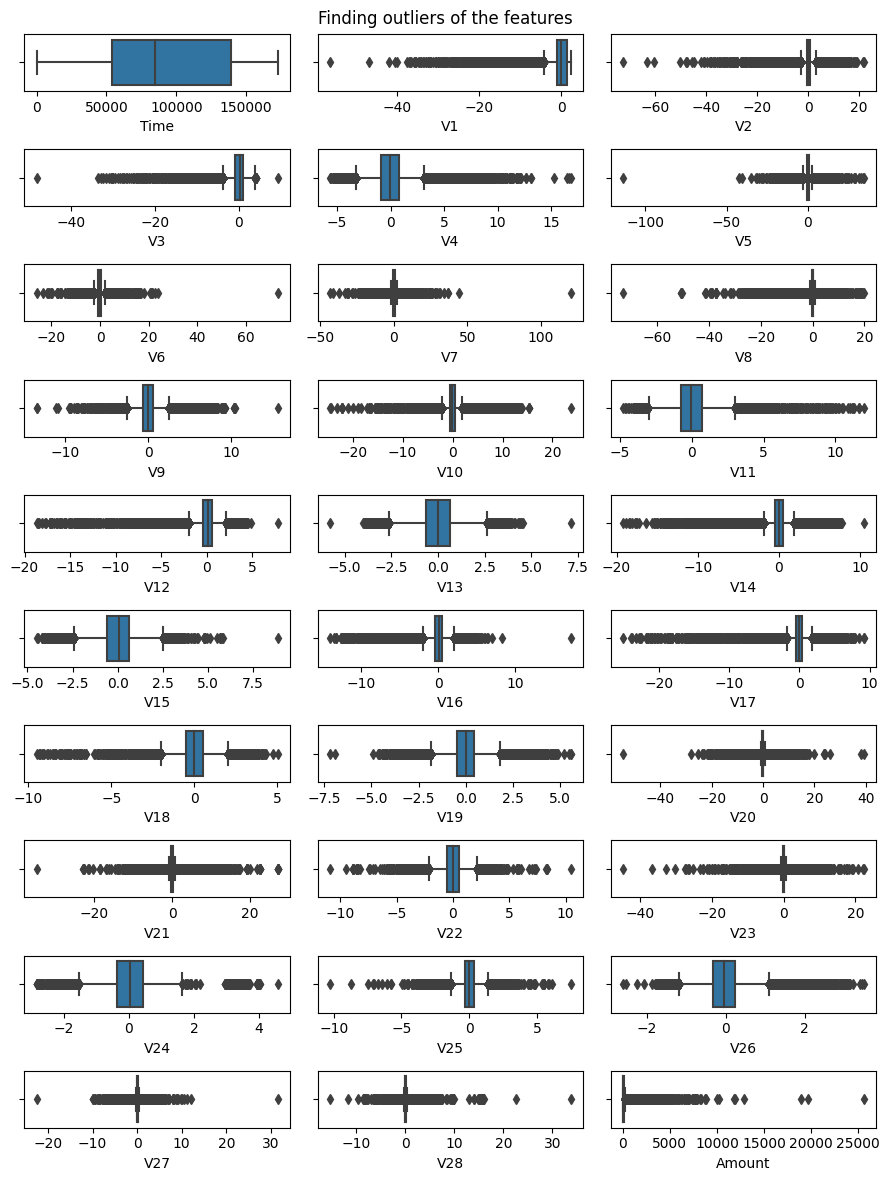

In [7]:
fig, axes = plt.subplots(10, 3, figsize=(9, 12))
for idx, col_name in enumerate(numeric_columns):
    i, j = divmod(idx, 3)
    # print(i, j, col_name)
    sns.boxplot(df, x=col_name, ax=axes[i, j])
plt.suptitle('Finding outliers of the features')
fig.tight_layout()
plt.show()

##### Outlier detection

In [8]:
def is_outlier_whiskers(feature):
    # Finding IQR
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    
    # Flagging outliers which are apart 1.5 * IQR
    whiskers_outliers = (feature < lower_fence) | (feature > upper_fence)

    return whiskers_outliers

In [9]:
def is_outlier_zscore(feature, threshold=1.5):
    feature_z_score = (feature - feature.mean()) / feature.std()
    z_score_outliers = feature_z_score.abs() > threshold
    return z_score_outliers

##### Analyzing the z-score to decide the threshold

In [10]:
records = []
for col in numeric_columns:
    feature_z_score = (df[col] - df[col].mean()) / df[col].std()
    records.append([min(df[col]), df[col].mean(), df[col].std(), max(df[col]), min(feature_z_score), feature_z_score.mean(), feature_z_score.std(), max(feature_z_score)])

display(pd.DataFrame(
    records, columns=['Min value', 'Mean value', 'Std.', 'Max value', 'Min z-scr', 'Mean z-scr', 'Std. z-scr', 'Max z-scr'], index=numeric_columns
).round(2))


Min value  Mean value      Std.  Max value  Min z-scr  Mean z-scr   
Time         0.00    94813.86  47488.15  172792.00      -2.00        -0.0  \
V1         -56.41        0.00      1.96       2.45     -28.80         0.0   
V2         -72.72        0.00      1.65      22.06     -44.04        -0.0   
V3         -48.33       -0.00      1.52       9.38     -31.87        -0.0   
V4          -5.68        0.00      1.42      16.88      -4.01         0.0   
V5        -113.74        0.00      1.38      34.80     -82.41         0.0   
V6         -26.16        0.00      1.33      73.30     -19.64         0.0   
V7         -43.56       -0.00      1.24     120.59     -35.21         0.0   
V8         -73.22        0.00      1.19      20.01     -61.30        -0.0   
V9         -13.43       -0.00      1.10      15.59     -12.23         0.0   
V10        -24.59        0.00      1.09      23.75     -22.58         0.0   
V11         -4.80        0.00      1.02      12.02      -4.70         0.0   
V12        -18.68       -0.00      1.00       7.85     -18.70        -0.0   
V13         -5.79        0.00      1.00       7.13      -5.82         0.0   
V14        -19.21        0.00      0.96      10.53     -20.04         0.0   
V15         -4.50        0.00      0.92       8.88      -4.92         0.0   
V16        -14.13        0.00      0.88      17.32     -16.13         0.0   
V17        -25.16       -0.00      0.85       9.25     -29.63        -0.0   
V18         -9.50        0.00      0.84       5.04     -11.33         0.0   
V19         -7.21        0.00      0.81       5.59      -8.86         0.0   
V20        -54.50        0.00      0.77      39.42     -70.69        -0.0   
V21        -34.83        0.00      0.73      27.20     -47.42        -0.0   
V22        -10.93       -0.00      0.73      10.50     -15.07         0.0   
V23        -44.81        0.00      0.62      22.53     -71.75         0.0   
V24         -2.84        0.00      0.61       4.58      -4.68         0.0   
V25        -10.30        0.00      0.52       7.52     -19.75        -0.0   
V26         -2.60        0.00      0.48       3.52      -5.40         0.0   
V27        -22.57       -0.00      0.40      31.61     -55.91         0.0   
V28        -15.43       -0.00      0.33      33.85     -46.75        -0.0   
Amount       0.00       88.35    250.12   25691.16      -0.35         0.0   

        Std. z-scr  Max z-scr  
Time           1.0       1.64  
V1             1.0       1.25  
V2             1.0      13.36  
V3             1.0       6.19  
V4             1.0      11.92  
V5             1.0      25.21  
V6             1.0      55.02  
V7             1.0      97.48  
V8             1.0      16.75  
V9             1.0      14.19  
V10            1.0      21.81  
V11            1.0      11.78  
V12            1.0       7.85  
V13            1.0       7.16  
V14            1.0      10.98  
V15            1.0       9.70  
V16            1.0      19.76  
V17            1.0      10.89  
V18            1.0       6.01  
V19            1.0       6.87  
V20            1.0      51.13  
V21            1.0      37.03  
V22            1.0      14.47  
V23            1.0      36.08  
V24            1.0       7.57  
V25            1.0      14.43  
V26            1.0       7.29  
V27            1.0      78.32  
V28            1.0     102.54  
Amount         1.0     102.36

The z-score of the columns ranging from `-82.41` to `102.54`.  
Usually the threshold would be considered from 2 to 3. Due to the higher range here, we can consider the threshold as 9.

In [11]:
amt_outliers = is_outlier_zscore(df['Amount'], 9)
print(df[amt_outliers]['Class'].value_counts())
df[amt_outliers & (df['Class'] == 1)]

Class
0    505
Name: count, dtype: int64


Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]

##### Outlier Removal

In [12]:
df_raw = df.copy()
for col in numeric_columns:
    outliers = is_outlier_zscore(df[col], 9)
    df = df[~outliers]
print(f'{df_raw.shape[0] - df.shape[0]} outliers have been removed')

4158 outliers have been removed


In [13]:
df['Class'].value_counts()

Class
0    280441
1       208
Name: count, dtype: int64

### Normalization

As the `Time` and `Amount` columns are in different units than other columns, it is better to normalize the columns.
Since the relationship among the variables are important and the outliers are removed, we can use `MinMaxScaler` to normalize the data.

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
display(df)

Time        V1        V2        V3        V4        V5        V6   
0       0.000000  0.789229  0.535514  0.904386  0.542975  0.483766  0.517793  \
1       0.000000  0.930213  0.549180  0.767179  0.471463  0.501649  0.486504   
2       0.000006  0.789309  0.484412  0.860203  0.466205  0.476365  0.594652   
3       0.000006  0.810973  0.530980  0.861348  0.370621  0.498492  0.562872   
4       0.000012  0.800366  0.573839  0.847206  0.467994  0.480675  0.496744   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.999965  0.207909  0.944547  0.188140  0.278089  0.258131  0.341502   
284803  0.999971  0.823873  0.536227  0.875361  0.380209  0.537931  0.552028   
284804  0.999977  0.970420  0.526302  0.569397  0.394109  0.617044  0.665345   
284805  0.999977  0.851076  0.559838  0.798213  0.490044  0.481987  0.527059   
284806  1.000000  0.834889  0.530798  0.798261  0.398073  0.498391  0.453922   

              V7        V8        V9  ...       V21       V22       V23   
0       0.494567  0.506023  0.367281  ...  0.498241  0.579649  0.487214  \
1       0.476615  0.505309  0.315180  ...  0.476850  0.442836  0.512243   
2       0.525683  0.513846  0.209229  ...  0.525698  0.653367  0.607760   
3       0.494455  0.520660  0.219968  ...  0.488962  0.538962  0.477776   
4       0.514490  0.486634  0.405476  ...  0.499156  0.657338  0.484024   
...          ...       ...       ...  ...       ...       ...       ...   
284802  0.203749  0.884452  0.497751  ...  0.522136  0.554873  0.620179   
284803  0.482430  0.516324  0.385877  ...  0.522214  0.676162  0.501745   
284804  0.464322  0.538040  0.373058  ...  0.524053  0.624490  0.495839   
284805  0.442368  0.536503  0.369662  ...  0.527476  0.657602  0.480970   
284806  0.569976  0.479066  0.377579  ...  0.527045  0.634170  0.544805   

             V24       V25       V26       V27       V28    Amount  Class  
0       0.423290  0.588957  0.310131  0.523496  0.496004  0.087571      0  
1       0.363989  0.594920  0.368762  0.500174  0.505007  0.001574      0  
2       0.313047  0.518546  0.319441  0.492587  0.486266  0.221625      0  
3       0.242154  0.669038  0.304023  0.511906  0.516767  0.072283      0  
4       0.434127  0.537320  0.438820  0.537545  0.555442  0.040964      0  
...          ...       ...       ...       ...       ...       ...    ...  
284802  0.339279  0.790885  0.391868  0.656040  0.708581  0.000451      0  
284803  0.265384  0.475486  0.271763  0.512847  0.487833  0.014509      0  
284804  0.506854  0.610134  0.329068  0.502373  0.494618  0.039729      0  
284805  0.431494  0.481269  0.447079  0.519449  0.527606  0.005853      0  
284806  0.414816  0.496011  0.193029  0.501249  0.504736  0.127008      0  

[280649 rows x 31 columns]

## Descriptive Analytics

#### Distribution

In [16]:
df['Class'].value_counts()

Class
0    280441
1       208
Name: count, dtype: int64

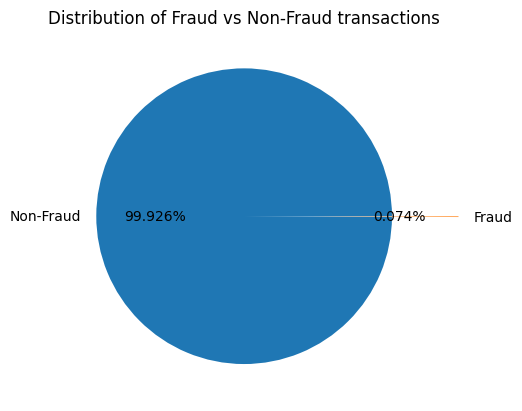

In [17]:
plt.pie(df['Class'].value_counts(), autopct='%.3f%%', explode=[0, 0.45], labels=['Non-Fraud', 'Fraud'])
plt.title('Distribution of Fraud vs Non-Fraud transactions')
plt.show()

The dataset has very neglible amount (`0.074%`) of positive class (The fraudulent transactions). The data is **highly imbalanced**.

#### Correlation

In [18]:
df_corr = df.corr()
df_corr['Class'].round(2)

Time     -0.00
V1       -0.01
V2        0.02
V3       -0.04
V4        0.05
V5       -0.01
V6       -0.02
V7       -0.03
V8       -0.00
V9       -0.02
V10      -0.06
V11       0.05
V12      -0.08
V13      -0.01
V14      -0.12
V15      -0.00
V16      -0.04
V17      -0.06
V18      -0.01
V19       0.01
V20       0.01
V21       0.02
V22       0.00
V23       0.00
V24      -0.00
V25      -0.00
V26       0.00
V27       0.02
V28       0.01
Amount    0.01
Class     1.00
Name: Class, dtype: float64

##### Top 10 Correlated Features

In [19]:
top_10_features = df_corr[df_corr['Class'] < 1]['Class'].abs().sort_values(ascending=False)[:10].index
df_corr.loc[top_10_features, 'Class']

V14   -0.118431
V12   -0.075458
V10   -0.064971
V17   -0.059191
V4     0.049861
V11    0.049154
V3    -0.044648
V16   -0.042453
V7    -0.027155
V9    -0.023964
Name: Class, dtype: float64

The `V14` feature has more correlation with the `Class` and it is a <b>Negative Correlation</b> with coefficient <b>-0.118431</b>

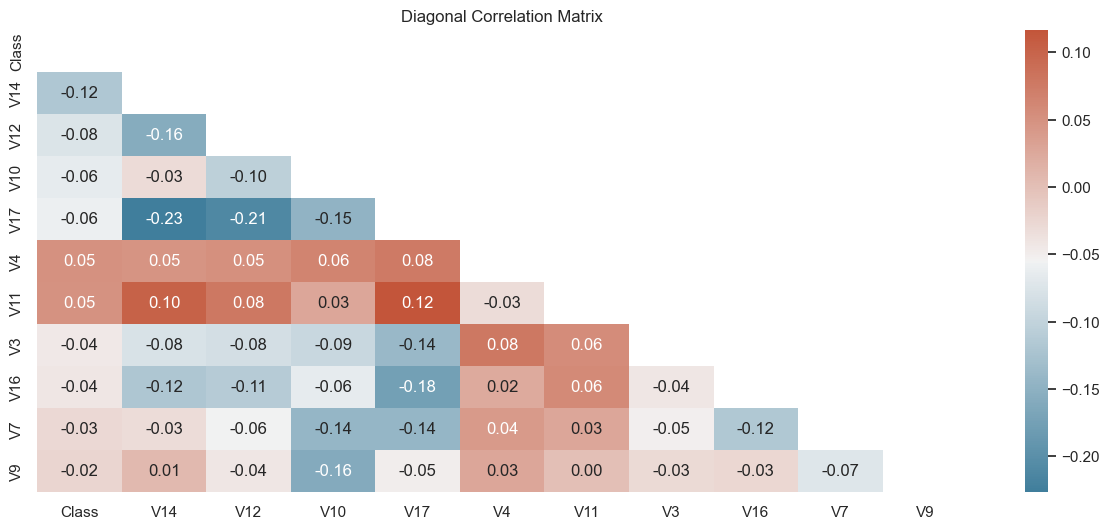

In [20]:
df_corr_10 = df_corr.loc[['Class', *top_10_features], ['Class', *top_10_features]]
sns.set_theme(style='white')
mask = np.triu(np.ones_like(df_corr_10, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df_corr_10, mask=mask, cmap=cmap, annot=True, fmt=".2f", ax=ax)
plt.title('Diagonal Correlation Matrix')
plt.show()

In [21]:
# sns.pairplot(df[['Class', *top_10_features]], hue='Class', vars=top_10_features, diag_kind='kde')
# plt.show()

As the pairplot is taking much time to generate, I have plotted it with the test data after train test split.

## ML Model Training and Testing

In [22]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
#from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1), df['Class'], 
    test_size=0.2, random_state=8883828,
    stratify=df['Class']
)
print(f'The data is splitted into train set with {X_train.shape[0]} records and test set with  {X_test.shape[0]}')

The data is splitted into train set with 224519 records and test set with  56130


Distribution of top 10 features

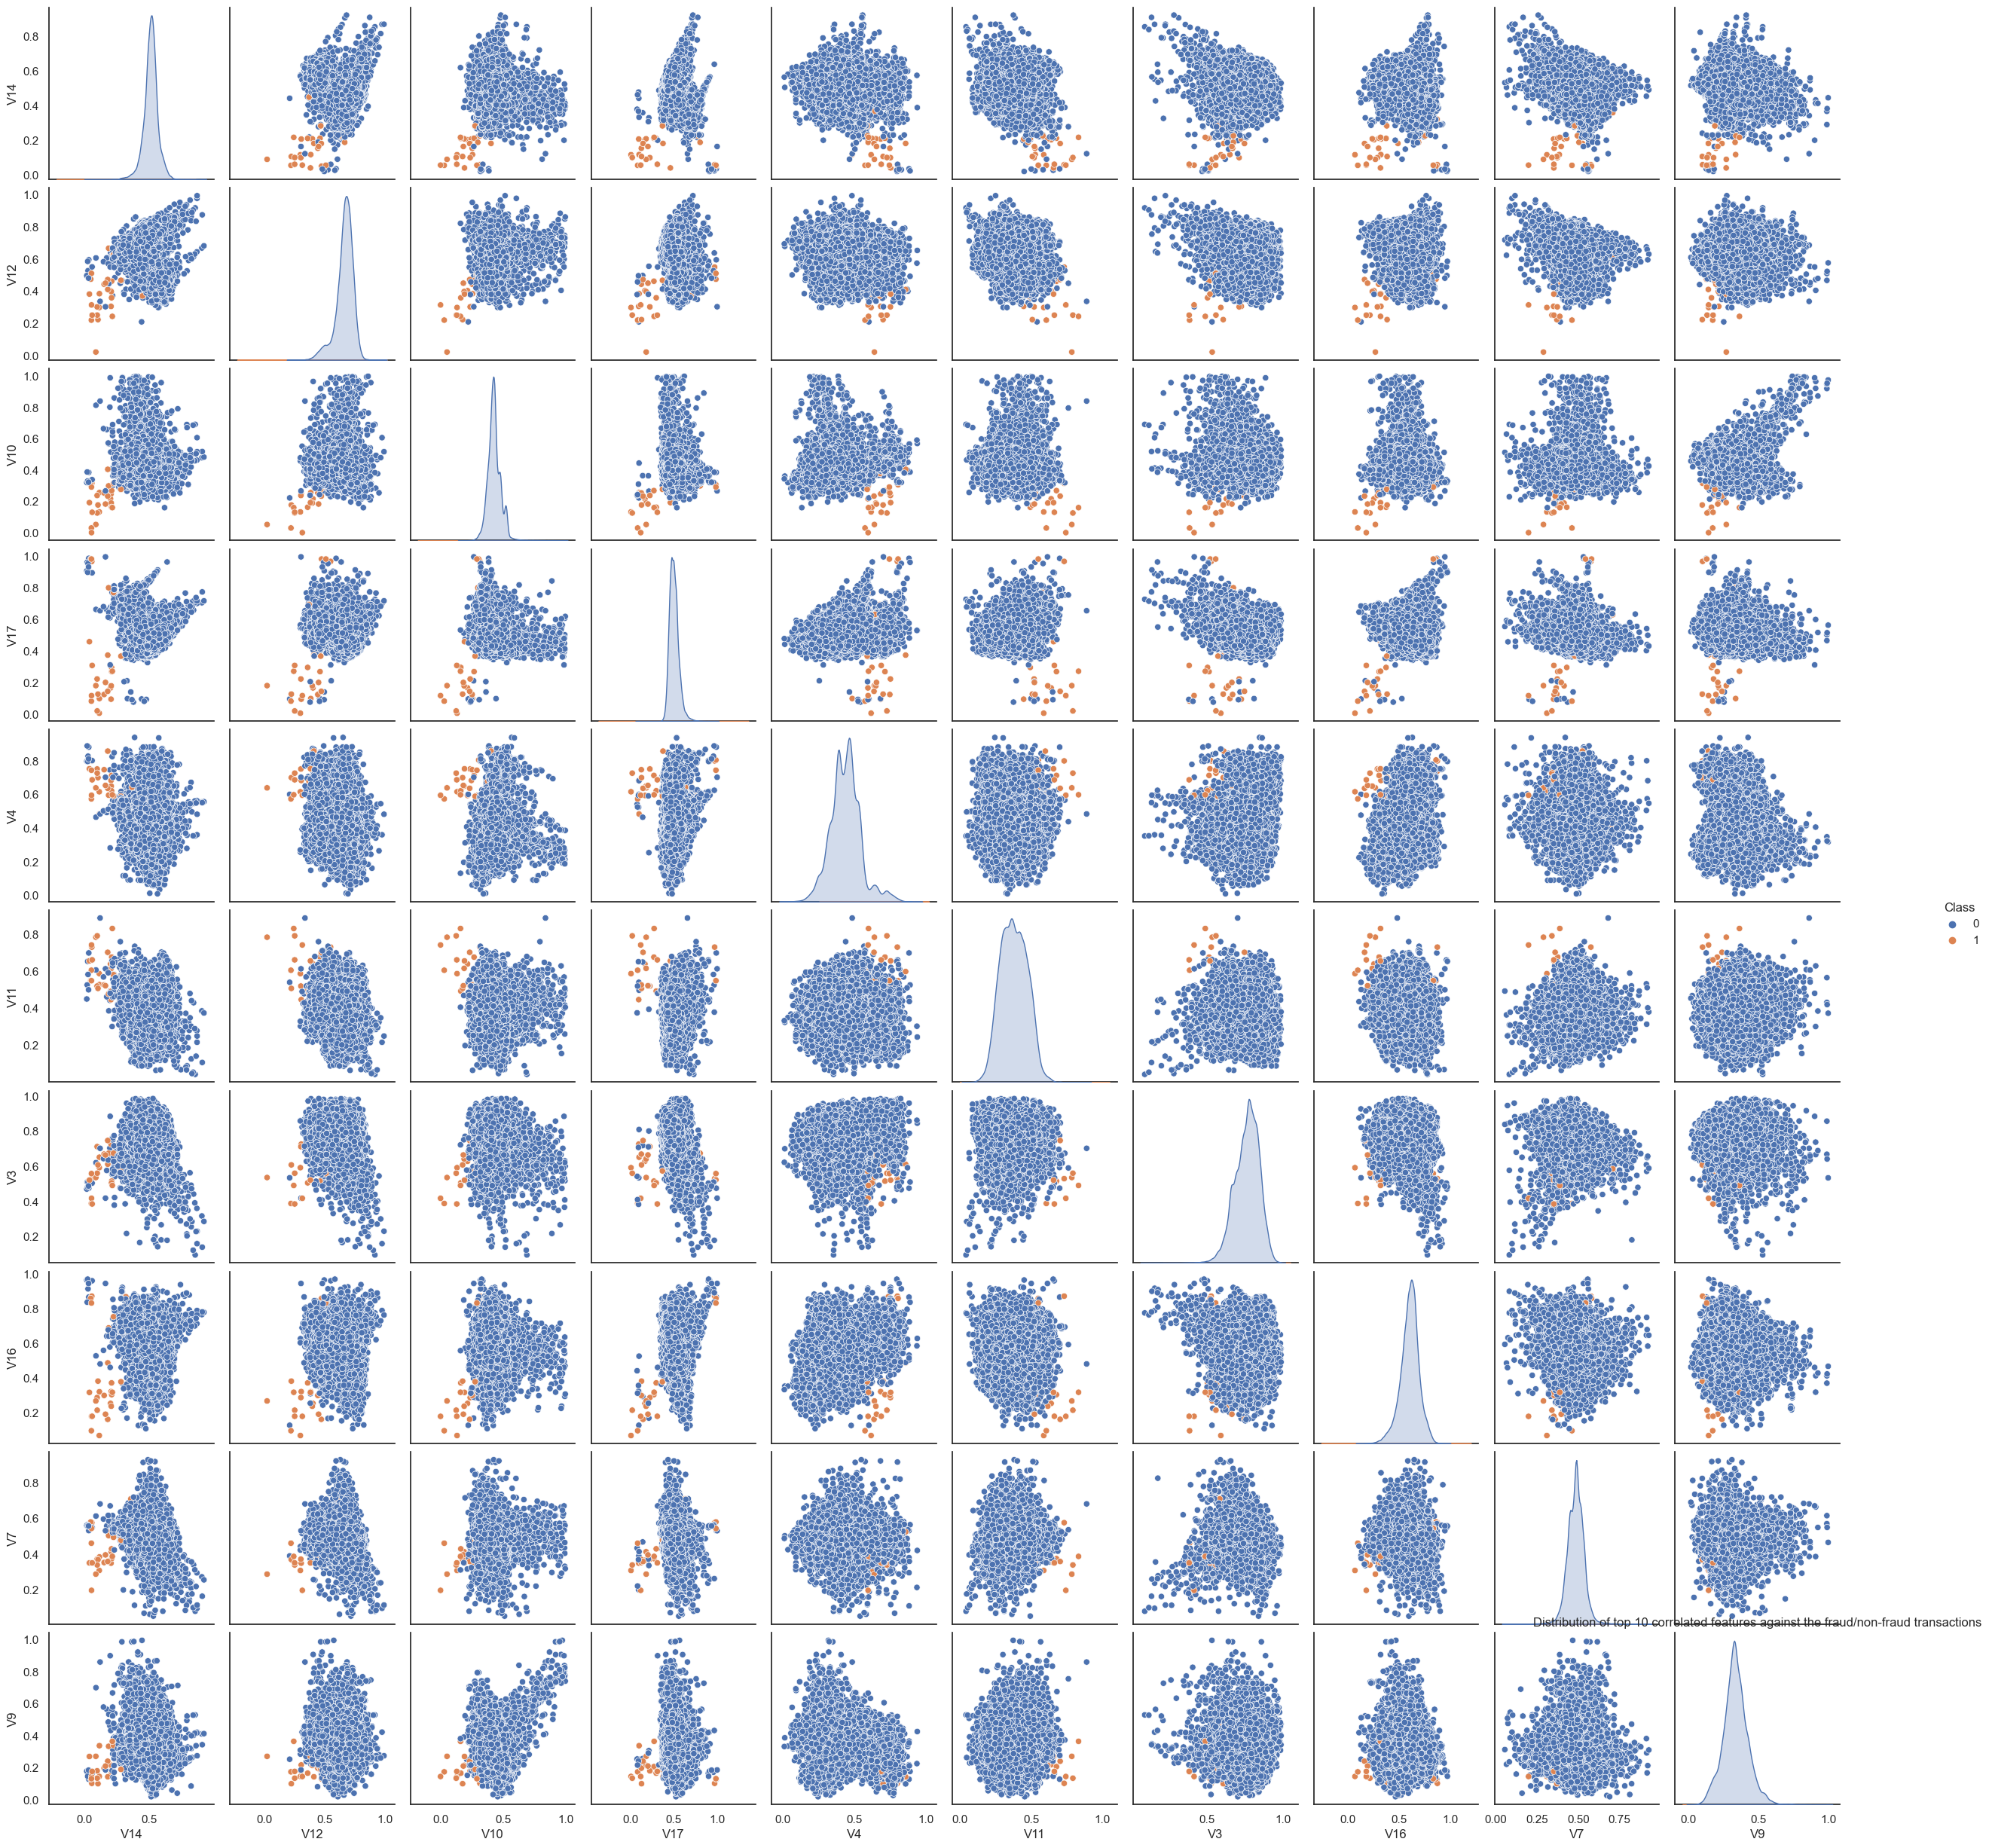

In [24]:
sns.pairplot(df.loc[X_test.index, ['Class', *top_10_features]], hue='Class', vars=top_10_features, diag_kind='kde')
plt.title('Distribution of top 10 correlated features against the fraud/non-fraud transactions')
plt.show()

#### Baseline Model

Building Model

In [25]:
baseline_model = LogisticRegression(random_state=8883828)
baseline_model.fit(X_train, y_train)

LogisticRegression(random_state=8883828)

Learned Coefficients

In [26]:
weights = pd.DataFrame(baseline_model.coef_[0], index=baseline_model.feature_names_in_, columns=['Coefficient'])
display(weights.sort_values(by='Coefficient', key=lambda x:abs(x), ascending=False))

Coefficient
V14       -8.342693
V4         6.067081
V12       -4.607731
V10       -3.851206
V11        3.610706
V3        -2.863708
V17       -2.319708
V16       -2.301846
V13       -1.786188
V9        -1.758520
V8        -1.505890
V7        -1.460467
V1        -1.430824
V6        -1.344582
Amount     1.332377
V18       -0.637324
Time      -0.567976
V26       -0.550839
V19       -0.535590
V24        0.400604
V28        0.383125
V15       -0.365932
V22        0.355773
V5         0.246263
V2         0.181267
V27        0.171601
V23        0.155047
V25        0.100328
V21        0.090993
V20        0.066082

The model gave maximum weight to `V14` and its weight is `-8.342693`. Next to it, `V4` has `6.067081` as its weight.

In [27]:
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

cv_results = cross_validate(baseline_model, X_test, y_test, scoring=scoring_metrics, cv=5)
cv_df = pd.DataFrame.from_dict(cv_results)
display(cv_df)
print(cv_df.mean())

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
0  0.267652    0.032116       0.999287             0.0     0.000000  0.000000
1  0.448569    0.036903       0.999555             1.0     0.375000  0.545455
2  0.231677    0.033161       0.999376             1.0     0.125000  0.222222
3  0.384200    0.015100       0.999376             1.0     0.222222  0.363636
4  0.290050    0.029057       0.999287             1.0     0.111111  0.200000

fit_time          0.324430
score_time        0.029268
test_accuracy     0.999376
test_precision    0.800000
test_recall       0.166667
test_f1           0.266263
dtype: float64


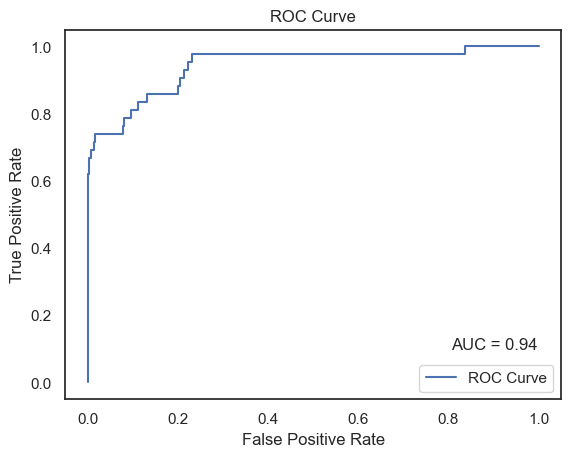

In [28]:
y_pred_proba = baseline_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.text(0.805, 0.1, f'AUC = {auc:.2f}')
plt.legend()
plt.show()

The Area Under Receiver Operating Characteristics Curve for the baseline model is `94%`.  
This means the model is 94% good and robust in classifying the credit card transaction as fraud or non-fraud.

### Handling Class Imbalance

Finding class weights

In [29]:
class_weights = compute_class_weight('balanced', classes=y_train.unique(), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
class_weights_dict

{0: 0.500369952708455, 1: 676.2620481927711}

Building Balanced Model

In [30]:
balanced_model = LogisticRegression(class_weight=class_weights_dict, random_state=8883828)
balanced_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.500369952708455, 1: 676.2620481927711},
                   random_state=8883828)

Model Evaluation

In [31]:
cv_results = cross_validate(balanced_model, X_test, y_test, scoring=scoring_metrics, cv=5)
cv_df = pd.DataFrame.from_dict(cv_results)
display(cv_df)
print(cv_df.mean())

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
0  1.007422    0.051835       0.921700        0.006795     0.750000  0.013468
1  0.819167    0.024921       0.921700        0.007910     0.875000  0.015677
2  0.600832    0.030262       0.930340        0.006378     0.625000  0.012626
3  0.789669    0.032063       0.923659        0.009259     0.888889  0.018328
4  0.798304    0.031701       0.947265        0.010084     0.666667  0.019868

fit_time          0.803079
score_time        0.034156
test_accuracy     0.928933
test_precision    0.008085
test_recall       0.761111
test_f1           0.015993
dtype: float64


Unexpectedly, balancing the class is reducing performance for this dataset.  
The baseline model has average f1-score `0.266263` whereas the balanced model has only `0.015993`.  
Also, the precision is very very less `0.008085`. So this model is performing very badly for credit card fraud detection.

### KNN Model

In [32]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
cv_results = cross_validate(knn_model, X_test, y_test, scoring=scoring_metrics, cv=5)
cv_df = pd.DataFrame.from_dict(cv_results)
display(cv_df)
print(cv_df.mean())

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
0  0.103518    3.074468       0.999466        0.750000     0.375000    0.500
1  0.060120    2.614231       0.999733        0.857143     0.750000    0.800
2  0.053923    2.891817       0.999466        1.000000     0.250000    0.400
3  0.064559    2.722029       0.999466        0.714286     0.555556    0.625
4  0.056105    2.556229       0.999466        1.000000     0.333333    0.500

fit_time          0.067645
score_time        2.771755
test_accuracy     0.999519
test_precision    0.864286
test_recall       0.452778
test_f1           0.565000
dtype: float64


### Support Vector Machine

In [35]:
svm_model = SVC(random_state=8883828)
svm_model.fit(X_train, y_train)

SVC(random_state=8883828)

In [36]:
cv_results = cross_validate(svm_model, X_test, y_test, scoring=scoring_metrics, cv=5)
cv_df = pd.DataFrame.from_dict(cv_results)
display(cv_df)
print(cv_df.mean())

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
0  1.373675    0.801016       0.999466        0.750000     0.375000  0.500000
1  1.384840    0.993112       0.999822        1.000000     0.750000  0.857143
2  1.230355    0.703078       0.999555        1.000000     0.375000  0.545455
3  1.251927    0.716198       0.999466        0.714286     0.555556  0.625000
4  0.986280    0.541178       0.999555        1.000000     0.444444  0.615385

fit_time          1.245415
score_time        0.750917
test_accuracy     0.999572
test_precision    0.892857
test_recall       0.500000
test_f1           0.628596
dtype: float64


Since the dataset is imbalanced, we cannot consider the accuracy as it may skew. <br>
So, considering F1-score, `SVM` (0.015993) performs better than the baseline `Logistic Regression` (0.266263) and `KNN` (0.565000).  
  
For credit card fraud detection model, the precision is more important becuase misclassifying a legitimate transaction as a fraudulent, the customers would be annoyed and it will reduce the reputaion of the bank.  
Based on precision also, the `SVM` (0.892857) outperformed `Logistic Regression` (0.8) and `KNN` (0.864286).

---